In [1]:
pip install dtreeviz.trees

ERROR: Could not find a version that satisfies the requirement dtreeviz.trees (from versions: none)
ERROR: No matching distribution found for dtreeviz.trees
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import requests
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import statistics as stat
import matplotlib.cm as cm
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans , AgglomerativeClustering, DBSCAN
import graphviz

In [3]:
Movies_Data=pd.read_csv('IMDb_data.csv')
Movies_Data

,position,const,created,modified,description,Title,Title type,Directors,You rated,IMDb Rating,Runtime (mins),Year,Genres,Num. Votes,Release Date (month/day/year),URL
0,1,tt2872718,Sat Dec 31 00:00:00 2016,NaN,NaN,Nightcrawler,Feature Film,Dan Gilroy,8,7.9,117.0,2014,"crime, drama, thriller",311885,9/5/14,http://www.imdb.com/title/tt2872718/
1,2,tt1260502,Fri Dec 30 00:00:00 2016,NaN,NaN,Ghost in the Shell 2.0,Feature Film,Mamoru Oshii,7,8.0,83.0,2008,"animation, action, crime, drama, sci_fi",10196,7/12/08,http://www.imdb.com/title/tt1260502/
2,3,tt0944947,Fri Dec 30 00:00:00 2016,NaN,NaN,Game of Thrones,TV Series,NaN,10,9.5,56.0,2011,"adventure, drama, fantasy, romance",1095188,4/17/11,http://www.imdb.com/title/tt0944947/
3,4,tt0367594,Fri Dec 30 00:00:00 2016,NaN,NaN,Charlie and the Chocolate Factory,Feature Film,Tim Burton,6,6.7,115.0,2005,"adventure, comedy, family, fantasy",331238,7/10/05,http://www.imdb.com/title/tt0367594/
4,5,tt0317219,Fri Dec 30 00:00:00 2016,NaN,NaN,Cars,Feature Film,"John Lasseter, Joe Ranft",7,7.2,117.0,2006,"animation, adventure, comedy, family, sport",272829,3/14/06,http://www.imdb.com/title/tt0317219/
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
504,505,tt0245712,Sun Jan 4 00:00:00 2015,NaN,NaN,Amores Perros,Feature Film,Alejandro González Iñárritu,7,8.1,154.0,2000,"drama, thriller",178506,5/14/00,http://www.imdb.com/title/tt0245712/
505,506,tt2800240,Sun Jan 4 00:00:00 2015,NaN,NaN,Serial (Bad) Weddings,Feature Film,Philippe de Chauveron,7,7.0,97.0,2014,comedy,25603,4/16/14,http://www.imdb.com/title/tt2800240/
506,507,tt0050825,Sun Jan 4 00:00:00 2015,NaN,NaN,Paths of Glory,Feature Film,Stanley Kubrick,8,8.5,88.0,1957,"drama, war",125510,11/1/57,http://www.imdb.com/title/tt0050825/
507,508,tt0486822,Sun Jan 4 00:00:00 2015,NaN,NaN,Disturbia,Feature Film,D.J. Caruso,7,6.9,105.0,2007,"drama, mystery, thriller",190202,4/4/07,http://www.imdb.com/title/tt0486822/


In [4]:
Movies_Data.columns.values

array(['position', 'const', 'created', 'modified', 'description', 'Title',
       'Title type', 'Directors', 'You rated', 'IMDb Rating',
       'Runtime (mins)', 'Year', 'Genres', 'Num. Votes',
       'Release Date (month/day/year)', 'URL'], dtype=object)

In [5]:
def map_title_type(title_type):
    if title_type == 'Feature Film':
        return 1
    elif title_type == 'TV Series':
        return 2
    elif title_type == 'Documentary':
        return 3
    else:
        return 0
#Movies_Data['Title type'] = Movies_Dataset['Title type'].apply(map_title_type)
Movies_Data.loc[:, 'Title type'] = Movies_Data['Title type'].apply(map_title_type)


In [6]:
Movies_Data

,position,const,created,modified,description,Title,Title type,Directors,You rated,IMDb Rating,Runtime (mins),Year,Genres,Num. Votes,Release Date (month/day/year),URL
0,1,tt2872718,Sat Dec 31 00:00:00 2016,NaN,NaN,Nightcrawler,1,Dan Gilroy,8,7.9,117.0,2014,"crime, drama, thriller",311885,9/5/14,http://www.imdb.com/title/tt2872718/
1,2,tt1260502,Fri Dec 30 00:00:00 2016,NaN,NaN,Ghost in the Shell 2.0,1,Mamoru Oshii,7,8.0,83.0,2008,"animation, action, crime, drama, sci_fi",10196,7/12/08,http://www.imdb.com/title/tt1260502/
2,3,tt0944947,Fri Dec 30 00:00:00 2016,NaN,NaN,Game of Thrones,2,NaN,10,9.5,56.0,2011,"adventure, drama, fantasy, romance",1095188,4/17/11,http://www.imdb.com/title/tt0944947/
3,4,tt0367594,Fri Dec 30 00:00:00 2016,NaN,NaN,Charlie and the Chocolate Factory,1,Tim Burton,6,6.7,115.0,2005,"adventure, comedy, family, fantasy",331238,7/10/05,http://www.imdb.com/title/tt0367594/
4,5,tt0317219,Fri Dec 30 00:00:00 2016,NaN,NaN,Cars,1,"John Lasseter, Joe Ranft",7,7.2,117.0,2006,"animation, adventure, comedy, family, sport",272829,3/14/06,http://www.imdb.com/title/tt0317219/
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
504,505,tt0245712,Sun Jan 4 00:00:00 2015,NaN,NaN,Amores Perros,1,Alejandro González Iñárritu,7,8.1,154.0,2000,"drama, thriller",178506,5/14/00,http://www.imdb.com/title/tt0245712/
505,506,tt2800240,Sun Jan 4 00:00:00 2015,NaN,NaN,Serial (Bad) Weddings,1,Philippe de Chauveron,7,7.0,97.0,2014,comedy,25603,4/16/14,http://www.imdb.com/title/tt2800240/
506,507,tt0050825,Sun Jan 4 00:00:00 2015,NaN,NaN,Paths of Glory,1,Stanley Kubrick,8,8.5,88.0,1957,"drama, war",125510,11/1/57,http://www.imdb.com/title/tt0050825/
507,508,tt0486822,Sun Jan 4 00:00:00 2015,NaN,NaN,Disturbia,1,D.J. Caruso,7,6.9,105.0,2007,"drama, mystery, thriller",190202,4/4/07,http://www.imdb.com/title/tt0486822/


In [7]:
Movies_Data["Runtime (mins)"].isna().sum()

1

In [8]:
Movies_Data = Movies_Data.dropna(subset=['Runtime (mins)'])

In [9]:
Movies_Data["Runtime (mins)"].isna().sum()

0

In [10]:
Movies_Dataset = Movies_Data[["Title type", "You rated", "IMDb Rating","Runtime (mins)" , "Year", "Num. Votes"]]
Movies_Dataset

,Title type,You rated,IMDb Rating,Runtime (mins),Year,Num. Votes
0,1,8,7.9,117.0,2014,311885
1,1,7,8.0,83.0,2008,10196
2,2,10,9.5,56.0,2011,1095188
3,1,6,6.7,115.0,2005,331238
4,1,7,7.2,117.0,2006,272829
...,...,...,...,...,...,...
504,1,7,8.1,154.0,2000,178506
505,1,7,7.0,97.0,2014,25603
506,1,8,8.5,88.0,1957,125510
507,1,7,6.9,105.0,2007,190202


In [11]:
Movies_Dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 508 entries, 0 to 508
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Title type      508 non-null    int64  
 1   You rated       508 non-null    int64  
 2   IMDb Rating     508 non-null    float64
 3   Runtime (mins)  508 non-null    float64
 4   Year            508 non-null    int64  
 5   Num. Votes      508 non-null    int64  
dtypes: float64(2), int64(4)
memory usage: 27.8 KB


In [12]:
Movies_Data_1 = Movies_Dataset.select_dtypes(include='number')
Movies_Data_1

,Title type,You rated,IMDb Rating,Runtime (mins),Year,Num. Votes
0,1,8,7.9,117.0,2014,311885
1,1,7,8.0,83.0,2008,10196
2,2,10,9.5,56.0,2011,1095188
3,1,6,6.7,115.0,2005,331238
4,1,7,7.2,117.0,2006,272829
...,...,...,...,...,...,...
504,1,7,8.1,154.0,2000,178506
505,1,7,7.0,97.0,2014,25603
506,1,8,8.5,88.0,1957,125510
507,1,7,6.9,105.0,2007,190202


In [13]:
Movies_Data_2 = Movies_Data_1.sample(n=450, random_state=42)
Movies_Data_2

,Title type,You rated,IMDb Rating,Runtime (mins),Year,Num. Votes
79,3,7,8.3,86.0,2014,1562
317,1,7,7.3,96.0,1998,51935
486,1,6,7.6,101.0,2001,275571
397,1,6,7.3,159.0,1999,233199
168,1,5,6.2,130.0,1993,108968
...,...,...,...,...,...,...
13,1,7,8.0,83.0,1995,84608
316,1,6,6.8,85.0,1991,85151
88,1,9,8.0,99.0,2004,406438
388,1,4,7.6,113.0,2007,431036


In [14]:
 Movies_Data_1.isna().sum()

Title type        0
You rated         0
IMDb Rating       0
Runtime (mins)    0
Year              0
Num. Votes        0
dtype: int64

In [15]:
from sklearn.model_selection import train_test_split
TrainDF, TestDF = train_test_split(Movies_Data_1, test_size=0.3)
print(TrainDF)
print(TestDF)

     Title type  You rated  IMDb Rating  Runtime (mins)  Year  Num. Votes
256           1          8          7.9           157.0  1999      136128
157           1          8          7.4            97.0  2014      176429
108           2         10          8.8            60.0  2015       47528
435           1          8          8.5           137.0  2006      268415
214           1          7          6.1            86.0  2004         709
..          ...        ...          ...             ...   ...         ...
110           1          7          7.6           120.0  2004      299921
141           1          6          6.6            97.0  2000        3434
337           1          7          8.2           131.0  1988      611321
123           1          6          6.4           128.0  2005       87091
190           1          6          6.6            93.0  2005      192915

[355 rows x 6 columns]
     Title type  You rated  IMDb Rating  Runtime (mins)  Year  Num. Votes
215           

In [16]:
Test1Labels=TestDF["Title type"]
print(Test1Labels)
## remove labels
TestDF1 = TestDF.drop(["Title type"], axis=1)
print(TestDF1)
#TestDF1 = TestDF1.dropna()
## TRAIN ----------------------------

Train1Labels=TrainDF["Title type"]
print(Train1Labels)
## remove labels
TrainDF1 = TrainDF.drop(["Title type"], axis=1)
print(TrainDF1)
#TrainDF1 = TrainDF1.dropna()

215    1
74     1
36     1
396    1
95     1
      ..
70     1
35     1
471    1
246    1
279    1
Name: Title type, Length: 153, dtype: int64
     You rated  IMDb Rating  Runtime (mins)  Year  Num. Votes
215          9          8.6           169.0  2014      984337
74           6          6.4           124.0  1997      149509
36           7          8.1           128.0  2015      233868
396          7          7.6           118.0  1984      340623
95           9          8.0           144.0  2015      522137
..         ...          ...             ...   ...         ...
70           7          7.3           138.0  1997      289852
35           7          7.8           130.0  2015      218748
471          6          8.0           115.0  2008      177144
246         10          8.2           116.0  2008      577802
279          8          7.8           116.0  2001      413149

[153 rows x 5 columns]
256    1
157    1
108    2
435    1
214    1
      ..
110    1
141    1
337    1
123    1

In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt
## conda install python-graphviz
## restart kernel (click the little red x next to the Console)
#import graphviz 
from sklearn.metrics import confusion_matrix
MyDT=DecisionTreeClassifier(criterion='entropy', ##"entropy" or "gini"
                            splitter='best',
                           max_depth=2,
                           class_weight=None)

In [18]:
MyDT.fit(TrainDF, Train1Labels)

DecisionTreeClassifier(criterion='entropy', max_depth=2)

[Text(0.5, 0.8333333333333334, 'X[0] <= 1.5\nentropy = 0.627\nsamples = 355\nvalue = [3, 314, 32, 6]'),
 Text(0.25, 0.5, 'X[0] <= 0.5\nentropy = 0.077\nsamples = 317\nvalue = [3, 314, 0, 0]'),
 Text(0.125, 0.16666666666666666, 'entropy = 0.0\nsamples = 3\nvalue = [3, 0, 0, 0]'),
 Text(0.375, 0.16666666666666666, 'entropy = 0.0\nsamples = 314\nvalue = [0, 314, 0, 0]'),
 Text(0.75, 0.5, 'X[0] <= 2.5\nentropy = 0.629\nsamples = 38\nvalue = [0, 0, 32, 6]'),
 Text(0.625, 0.16666666666666666, 'entropy = 0.0\nsamples = 32\nvalue = [0, 0, 32, 0]'),
 Text(0.875, 0.16666666666666666, 'entropy = 0.0\nsamples = 6\nvalue = [0, 0, 0, 6]')]

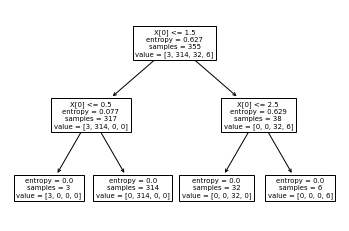

In [19]:
tree.plot_tree(MyDT)

In [20]:
from sklearn.naive_bayes import MultinomialNB
MyModelNB= MultinomialNB()
NB1=MyModelNB.fit(TrainDF1, Train1Labels)
Prediction1 = MyModelNB.predict(TestDF1)

In [21]:
from sklearn.metrics import confusion_matrix

cnf_matrix1 = confusion_matrix(Test1Labels, Prediction1)
print("\nThe confusion matrix is:")
print(cnf_matrix1)



The confusion matrix is:
[[ 0  0  1  0]
 [ 7 71 54  5]
 [ 0  2  9  2]
 [ 1  0  0  1]]


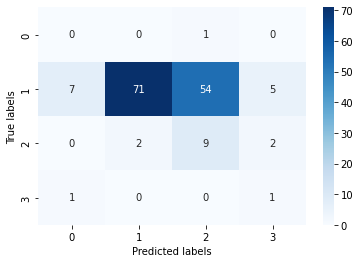

In [22]:
sns.heatmap(cnf_matrix1, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()
